In [1]:
%autosave 0
from biglearn import createNewPred as CP
from biglearn import analyserML as ML
from alys import regression as alysCL
from alys import  save as SV
from graph import rViz 

from pandas import read_csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import csv

# ignore Warning
import warnings
warnings.filterwarnings("ignore")

Autosave disabled


In [5]:
df_base = read_csv('movies2.csv', index_col=0)

In [3]:
df_base.sample(3)

,imdb_id,title,synopsis,rating,genre,prod_budget,duration,release_date,director,people,produceur,country,writer,target,box_office
id,,,,,,,,,,,,,,,
3781,tt1567448,Yahsi Bati,"In 1881, two Ottoman Secret Agents travel to t...",TP,"Comedy, Western",2000000,112,2010-04-28,Ömer Faruk Sorak,"Cem Yilmaz, Ozan Güven, Zafer Algöz, Demet Evgar",NaN,Turkey,Cem Yilmaz,7.4,13734500
4097,tt3177316,Honeymoon,A newlywed couple finds their lake-country hon...,TP,"Horror, Mystery, Thriller",1000000,87,2014-09-12,Leigh Janiak,"Rose Leslie, Harry Treadaway, Ben Huber, Hanna...",Magnolia Pictures/Magnet Releasing,USA,"Phil Graziadei, Leigh Janiak",5.7,24343
5634,tt0456470,L'arc,"On a fishing boat at sea, a 60-year old man ha...",TP,"Drama, Romance",950000,90,2005-12-14,Ki-duk Kim,"Yeo-reum Han, Ji-Seok Seo, Gook-hwan Jeon, Seo...",Tartan Films,"South Korea, Japan",Ki-duk Kim,7.2,2021070


In [4]:
drop_col = ("box_office","prod_budget","imdb_id")
for i in drop_col:
    df_base = df_base.drop(columns=i) 
df_base.sample(3)

,title,synopsis,rating,genre,duration,release_date,director,people,produceur,country,writer,target
id,,,,,,,,,,,,
485,10 bonnes raisons de te larguer,"A pretty, popular teenager can't go out on a d...",TP,"Comedy, Drama, Romance",97,2000-07-19,Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",Buena Vista Pictures,USA,"Karen McCullah, Kirsten Smith",7.3
6929,La fureur du juste,A martial artist must defeat a plan by ninjas ...,-12,"Action, Drama, Romance, Thriller",103,1981-05-06,Eric Karson,"Chuck Norris, Karen Carlson, Lee Van Cleef, Ar...",Media Home Entertainment,USA,"Leigh Chapman (screenplay by), Paul Aaron (sto...",5.1
1094,Valérian et la Cité des Mille Planètes,"A dark force threatens Alpha, a vast metropoli...",TP,"Action, Adventure, Fantasy, Sci-Fi",137,2017-07-26,Luc Besson,"Dane DeHaan, Cara Delevingne, Clive Owen, Rihanna",EuropaCorp / STXfilms,"France, China, Belgium, Germany, United Arab E...",Pierre Christin (based on the comic book serie...,6.5


In [5]:
SV.extraction(df_base)

nom du fichier.ex : movies2_tf.csv
Extraction commencé
Extraction terminé


In [8]:
CP.newDataSet()

Nom du fichier full train : movies2_tf.csv
valeur split train : 0.7
valeur split test : 0.3
Model selectioné : ensemble
Nom du champs objectif : target
Nom du fichier exporté : ml_ensemble_v2.csv
split ok
predict-lancée
prediction ok


In [11]:
df_pred = read_csv("Pred_Files/ml_ensemble_v2.csv")

In [20]:
alysCL.regr(df_pred)
print("RMSE = ",round(df_pred.loc[0,'RMSE'],4))
alysCL.posneg(df_pred)
df_pred.head(5)

nom colonne prediction : pred
nom colonne output : target
MAPE =  8.38
RMSE =  0.6419
On a 1326 erreurs positive, 1300 erreurs negative, 0 prediction parfaite


,title,synopsis,rating,genre,duration,release_date,director,people,produceur,country,...,release_date.day-of-week,target,pred,pourcerror,errorabs,mape,RMSE,positive erreur,negatif erreur,prediction parfaite
0,Inception,A thief who steals corporate secrets through t...,TP,"Action, Adventure, Sci-Fi, Thriller",148,2010-07-21,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",Warner Bros. Pictures,"USA, UK",...,3,8.8,8.22842,-0.064952,0.06,8.38,0.641878,1326.0,1300.0,0.0
1,Fight Club,An insomniac office worker and a devil-may-car...,-16,Drama,139,1999-11-10,David Fincher,"Edward Norton, Brad Pitt, Meat Loaf, Zach Grenier",20th Century Fox,"USA, Germany",...,3,8.8,7.64610,-0.131125,0.13,NaN,NaN,NaN,NaN,NaN
2,Forrest Gump,"The presidencies of Kennedy and Johnson, the e...",TP,"Drama, Romance",142,1994-10-05,Robert Zemeckis,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Paramount Pictures,USA,...,3,8.8,7.53387,-0.143878,0.14,NaN,NaN,NaN,NaN,NaN
3,Matrix,A computer hacker learns from mysterious rebel...,TP,"Action, Sci-Fi",136,1999-06-23,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",Warner Bros. Pictures,USA,...,3,8.7,7.59107,-0.127463,0.13,NaN,NaN,NaN,NaN,NaN
4,Le seigneur des anneaux: La communauté de l'an...,A meek Hobbit from the Shire and eight compani...,TP,"Adventure, Drama, Fantasy",178,2001-12-19,Peter Jackson,"Alan Howard, Noel Appleby, Sean Astin, Sala Baker",New Line Cinema,"New Zealand, USA",...,3,8.8,7.75372,-0.118895,0.12,NaN,NaN,NaN,NaN,NaN


model ID : ensemble/5e0604905299637b56004eb9
model name : ensemble


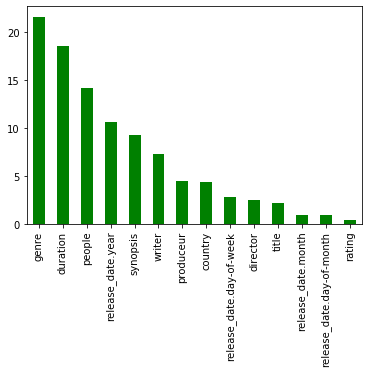

In [13]:
ML.summuary()

In [14]:
df_pred.sort_values("errorabs", axis = 0, ascending = False)

,title,synopsis,rating,genre,duration,release_date,director,people,produceur,country,...,release_date.day-of-week,target,pred,pourcerror,errorabs,mape,RMSE,positive erreur,negatif erreur,prediction parfaite
1414,Justin Bieber's Believe,A backstage and on-stage look at Justin Bieber...,TP,"Documentary, Music",92,2013-12-25,Jon M. Chu,"Justin Bieber, Scooter Braun, Ryan Good, Usher...",Freestyle Digital Media,USA,...,3,1.6,3.98248,1.489050,1.49,NaN,NaN,NaN,NaN,NaN
2339,É Fada!,Geraldine is a fairy who lost their wings by u...,-12,"Comedy, Family, Fantasy",86,2016-10-06,Cris D'Amato,"Kéfera Buchmann, Klara Castanho, Silvio Guinda...","Globo Filmes, Lereby Productions",Brazil,...,4,1.8,3.71917,1.066206,1.07,NaN,NaN,NaN,NaN,NaN
849,Le Monde secret des Emojis,"Gene, a multi-expressional emoji, sets out on ...",TP,"Animation, Adventure, Comedy, Family, Fantasy",86,2017-10-18,Tony Leondis,"T.J. Miller, James Corden, Anna Faris, Maya Ru...",Sony Pictures Animation,USA,...,3,3.2,6.43251,1.010159,1.01,NaN,NaN,NaN,NaN,NaN
578,Disaster Movie,"Over the course of one evening, an unsuspectin...",-12,Comedy,87,2008-08-29,"Jason Friedberg, Aaron Seltzer","Matt Lanter, Vanessa Lachey, Gary 'G. Thang' J...",Lionsgate,USA,...,5,1.9,3.78380,0.991474,0.99,NaN,NaN,NaN,NaN,NaN
1840,In the Mix,A successful DJ manages to rescue a powerful m...,TP,"Comedy, Crime, Drama, Music, Romance",95,2006-08-16,Ron Underwood,"Usher Raymond, Chazz Palminteri, Emmanuelle Ch...",Lions Gate Films,USA,...,3,2.8,5.37131,0.918325,0.92,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,Opération crépuscule,Experienced Green Beret sergeant Johnny Gallag...,TP,"Action, Crime, Drama, Thriller",108,1990-01-31,Andrew Davis,"Gene Hackman, Joanna Cassidy, Tommy Lee Jones,...",Orion Home Video,USA,...,3,6.4,6.37271,-0.004264,0.00,NaN,NaN,NaN,NaN,NaN
1364,Les poupées russes,Five years after their summer together in Barc...,TP,"Comedy, Drama, Romance",125,2005-06-15,Cédric Klapisch,"Romain Duris, Kelly Reilly, Audrey Tautou, Céc...",Cinema Libre Studio,"France, UK",...,3,7.0,7.00382,0.000546,0.00,NaN,NaN,NaN,NaN,NaN
433,R.I.P.D. Brigade fantôme,A recently slain cop joins a team of undead po...,TP,"Action, Adventure, Comedy, Crime, Fantasy, Sci-Fi",96,2013-07-31,Robert Schwentke,"Jeff Bridges, Ryan Reynolds, Kevin Bacon, Mary...",Universal Pictures,USA,...,3,5.6,5.59378,-0.001111,0.00,NaN,NaN,NaN,NaN,NaN
902,Répulsion,A sex-repulsed woman who disapproves of her si...,-16,"Drama, Horror, Thriller",105,1966-01-07,Roman Polanski,"Catherine Deneuve, Ian Hendry, John Fraser, Yv...",Royal Films International,UK,...,5,7.7,7.66273,-0.004840,0.00,NaN,NaN,NaN,NaN,NaN


In [21]:
alysCL.seuil_vs_error(df_pred)

valeur du seuil :0.1
il y'a 1788 erreurs inférieurs à 0.1, il y'a 838 erreurs supérieurs à 0.1
erreur sous seuil = 68.0883%


68.0883

In [23]:
alysCL.seuil_vs_error(df_pred)

valeur du seuil :0.2
il y'a 2443 erreurs inférieurs à 0.2, il y'a 183 erreurs supérieurs à 0.2
erreur sous seuil = 93.0312%


93.0312

# Comparaison avec le fichier test de décembre

In [9]:
df_ann = read_csv('inc_movies_2.csv')

In [10]:
drop_col = ("prod_budget","imdb_id","target")
for i in drop_col:
    df_ann = df_ann.drop(columns=i)

In [12]:
df_ann

,title,synopsis,rating,genre,duration,release_date,director,people,produceur,country,writer
0,The Aeronauts,Pilot Amelia Wren (Felicity Jones) and scienti...,TP,"Action, Adventure, Biography, Drama, Romance",100,2019-12-20,Tom Harper,"Felicity Jones, Eddie Redmayne, Himesh Patel, ...",Amazon Studios,"UK, USA","Tom Harper (story by), Jack Thorne (story by)"
1,En Brazos de un Asesino,Victor (William Levy) is one of the world's mo...,TP,"Romance, Thriller",106,2019-12-06,Matías Moltrasio,"William Levy, Alicia Sanz, Adrián Lastra, Robe...","Imakonos, William Levy Entertainment","USA, Dominican Republic","Jeff Goldberg, William Levy"
2,Portrait de la jeune fille en feu,On an isolated island in Brittany at the end o...,TP,"Drama, Romance",121,2019-09-18,Céline Sciamma,"Noémie Merlant, Adèle Haenel, Luàna Bajrami, V...","Lilies Films, Arte France Cinéma",France,Céline Sciamma (screenplay)
3,Little Joe,"Alice, a single mother, is a dedicated senior ...",TP,"Drama, Sci-Fi",105,2019-11-13,Jessica Hausner,"Emily Beecham, Ben Whishaw, Kerry Fox, Kit Connor",Magnolia Pictures,"UK, Austria, Germany","Géraldine Bajard, Jessica Hausner"
4,Midnight Family,"In Mexico City's wealthiest neighborhoods, the...",TP,"Documentary, Action, Crime, Drama",81,2019-12-06,Luke Lorentzen,Juan Ochoa,1091,Mexico,Luke Lorentzen
5,Jumanji: Next Level,The gang is back but the game has changed. As ...,TP,"Action, Adventure, Comedy, Fantasy",123,2019-12-04,Jake Kasdan,"Karen Gillan, Dwayne Johnson, Dania Ramirez, M...",Sony Pictures,USA,"Jake Kasdan, Jeff Pinkner"
6,Black Christmas,A group of female students are stalked by a st...,TP,"Horror, Mystery, Thriller",92,2019-12-11,Sophia Takal,"Cary Elwes, Imogen Poots, Brittany O'Grady, Al...","Universal Pictures, Blumhouse Productions","USA, New Zealand","Sophia Takal, April Wolfe"
7,Uncut Gems,A charismatic New York City jeweler always on ...,TP,"Comedy, Crime, Drama, Mystery, Thriller",135,2019-12-25,Benny Safdie,"Adam Sandler, Julia Fox, Kevin Garnett, The We...",A24,USA,"Ronald Bronstein, Benny Safdie"
8,Une vie cachée,"The Austrian Blessed Franz Jägerstätter, a con...",TP,"Biography, Drama, War",173,2019-12-11,Terrence Malick,"August Diehl, Valerie Pachner, Michael Nyqvist...",Fox Searchlight Pictures,"Germany, USA",Terrence Malick
9,Seberg,Inspired by real events about the French New W...,TP,"Biography, Drama, Thriller",96,2019-12-13,Jean Seberg,"Zazie Beetz, Kristen Stewart, Margaret Qualley...","Phreaker Films, Bradley Pilz Productions","UK, USA","Joe Shrapnel, Anna Waterhouse"


In [13]:
SV.extraction(df_ann)

nom du fichier.ex : inc_movies_2.csv
Extraction commencé
Extraction terminé


In [14]:
CP.predOnProdSet()

Nom du fichier full Prod : inc_movies_2.csv
Type de modèle : ensemble
Modèle id : ensemble/5e0604905299637b56004eb9
Nom du champs objectif : target
Nom du fichier exporté : ml_ensemble_v2_test.csv
fichier ok
predict-lancée
prediction ok


In [16]:
df_ann = read_csv("Pred_Files/ml_ensemble_v2_test.csv")

def Follow() :
    # creation d'un df temporaire pour plus de lisibilité
    df_temp = pandas.DataFrame()
    col = ('imdb_id','title','target')
    
    for i in col :
        df_temp[i] = df_ann[i]
    df_temp['pred'] = df_ann['pred']

    # je supprime de l'analyse les films qui ont pas encore de notes    
    ro = 0    
    for i in df_temp['target']:
        if i == 0 :
            df_temp = df_temp.drop(ro)
        ro +=1        
    
    df_temp['pred'] =  round(df_temp['pred'],2)  
    
    # fonction pour une analyse des erreurs
    alysCL.regr(df_temp)
    return df_temp
    
    
board = Follow()
board

nom colonne prediction : pred
nom colonne output : target
MAPE =  14.71


,imdb_id,title,target,pred,pourcerror,errorabs,mape,RMSE
0,tt6141246,The Aeronauts,6.6,5.78,-0.124242,0.12,14.71,1.010411
1,tt10080270,En Brazos de un Asesino,6.1,6.06,-0.006557,0.01,NaN,NaN
2,tt8613070,Portrait de la jeune fille en feu,8.3,7.31,-0.119277,0.12,NaN,NaN
3,tt9204204,Little Joe,5.8,6.77,0.167241,0.17,NaN,NaN
4,tt6010976,Midnight Family,7.7,6.68,-0.132468,0.13,NaN,NaN
5,tt7975244,Jumanji: Next Level,7.0,6.46,-0.077143,0.08,NaN,NaN
6,tt10481868,Black Christmas,3.2,5.60,0.750000,0.75,NaN,NaN
7,tt5727208,Uncut Gems,8.1,6.82,-0.158025,0.16,NaN,NaN
8,tt5827916,Une vie cachée,7.7,7.40,-0.038961,0.04,NaN,NaN
9,tt1780967,Seberg,4.7,5.97,0.270213,0.27,NaN,NaN


In [17]:
alysCL.seuil_vs_error(board)

valeur du seuil :0.2
il y'a 14 erreurs inférieurs à 0.2, il y'a 3 erreurs supérieurs à 0.2
erreur sous seuil = 82.3529%


82.3529

# Xgboost

In [2]:
import xgboost
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn import utils
import sklearn.metrics as SM
from sklearn.metrics import mean_squared_error as MSE

In [3]:
df_new = read_csv("movies2.csv")
df_prod = read_csv("inc_movies_2.csv")

In [4]:
for i in df_new :
    print(i)    

id
imdb_id
title
synopsis
rating
genre
prod_budget
duration
release_date
director
people
produceur
country
writer
target
box_office


In [5]:
y_trainfull = df_new['target']
x_trainfull = df_new.drop(['id','imdb_id','target','box_office','prod_budget'], axis=1)
x_test = df_prod.drop(['imdb_id','target','prod_budget'], axis=1)

In [6]:
seed = 48
np.random.seed(seed)

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_trainfull,y_trainfull , test_size=0.3, random_state=seed)

In [8]:
cols = ("title","synopsis","rating","genre","director","produceur","country","writer","people")

# transformation des colonnes en categorie INT/FLOAT
for i in cols:
    lbl = LabelEncoder() 
    
    lbl.fit(list(x_train[i].values)) 
    x_train[i] = lbl.fit_transform(list(x_train[i].values))
    
    lbl.fit(list(x_val[i].values)) 
    x_val[i] = lbl.fit_transform(list(x_val[i].values))
    
    lbl.fit(list(x_test[i].values)) 
    x_test[i] = lbl.fit_transform(list(x_test[i].values))
    
ordenc = OrdinalEncoder()
temp = x_train["release_date"].values.reshape(-1, 1)
ordenc.fit(list(temp))
temp = ordenc.transform(list(temp))
x_train["release_date"] = temp

temp2 = x_test["release_date"].values.reshape(-1, 1)
ordenc.fit(list(temp2))
temp2 = ordenc.transform(list(temp2))
x_test["release_date"] = temp2

temp3 = x_val["release_date"].values.reshape(-1, 1)
ordenc.fit(list(temp3))
temp3 = ordenc.transform(list(temp3))
x_val["release_date"] = temp3

        
print(utils.multiclass.type_of_target(x_train))
print(utils.multiclass.type_of_target(y_train))

multiclass-multioutput
continuous


In [13]:
regressor = XGBRegressor(colsample_bytree= 0.5, gamma= 0.7, max_depth= 5,n_estimators= 400, min_child_weight= 5,
                         subsample = 0.8, objective='reg:squarederror')
mod = regressor.fit(x_train, y_train)

In [14]:
pred_test_ann = mod.predict(x_val)
RMSE = np.sqrt(MSE(pred_test_ann, y_val))
score = SM.mean_absolute_error(pred_test_ann,y_val)

print("RMSE = ",RMSE.round(4))
print("MAPE = ", score)   

RMSE =  1.0692
MAPE =  0.8189649979787768


In [15]:
pred = mod.predict(x_test)
pred

array([7.612912 , 8.003956 , 7.466472 , 7.2357917, 7.0519476, 8.341817 ,
       7.402543 , 7.558139 , 8.334042 , 8.417551 , 7.7202725, 7.880784 ,
       8.097563 , 8.030191 , 7.7623634, 8.6025505, 7.5945616],
      dtype=float32)

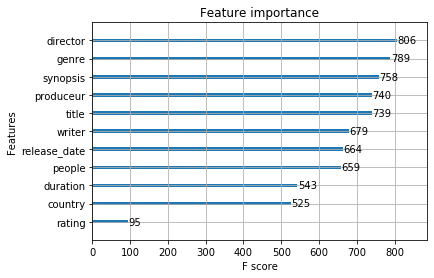

In [16]:
xgboost.plot_importance(mod)

In [18]:
df_v_bigml = read_csv('Pred_Files/ml_ensemble_v2_test.csv')

def Follow_xgb() :
    # creation d'un df temporaire pour plus de lisibilité
    df_temp = pandas.DataFrame()
    col = ('imdb_id','title','target')
    
    for i in col :
        df_temp[i] = df_prod[i]
        
    df_temp['pred_bigML'] = round(df_v_bigml['pred'],2)  
    df_temp['pred_Xgboost'] = np.around(pred,decimals=2)
    
        # fonction pour une analyse des erreurs
    alysCL.regr(df_temp)
    return df_temp

board = Follow_xgb()
board

nom colonne prediction : pred_Xgboost
nom colonne output : target
MAPE =  26.35


,imdb_id,title,target,pred_bigML,pred_Xgboost,pourcerror,errorabs,mape,RMSE
0,tt6141246,The Aeronauts,6.6,5.78,7.61,1.530303e-01,0.15,26.35,1.740977
1,tt10080270,En Brazos de un Asesino,6.1,6.06,8.00,3.114754e-01,0.31,NaN,NaN
2,tt8613070,Portrait de la jeune fille en feu,8.3,7.31,7.47,-1.000000e-01,0.10,NaN,NaN
3,tt9204204,Little Joe,5.8,6.77,7.24,2.482758e-01,0.25,NaN,NaN
4,tt6010976,Midnight Family,7.7,6.68,7.05,-8.441556e-02,0.08,NaN,NaN
5,tt7975244,Jumanji: Next Level,7.0,6.46,8.34,1.914286e-01,0.19,NaN,NaN
6,tt10481868,Black Christmas,3.2,5.60,7.40,1.312500e+00,1.31,NaN,NaN
7,tt5727208,Uncut Gems,8.1,6.82,7.56,-6.666667e-02,0.07,NaN,NaN
8,tt5827916,Une vie cachée,7.7,7.40,8.33,8.181817e-02,0.08,NaN,NaN
9,tt1780967,Seberg,4.7,5.97,8.42,7.914894e-01,0.79,NaN,NaN
